# 비대칭 데이터 문제
https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'

import numpy as np

<AxesSubplot:>

<AxesSubplot:>

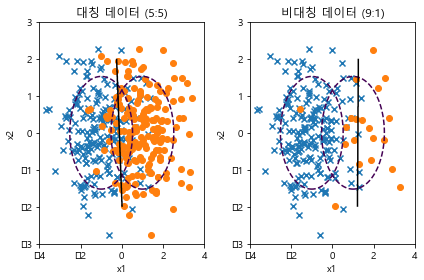

In [2]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from scipy.stats import multivariate_normal


def classification_result(n0, n1, title=""):
    rv1 = multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])

    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)

    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred
    
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "대칭 데이터 (5:5)")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "비대칭 데이터 (9:1)")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y1, y_pred1))
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



Text(0.5, 0, 'Fall-Out')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'ROC 커브')

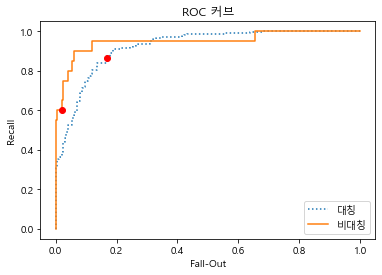

In [4]:
from sklearn.metrics import roc_curve, confusion_matrix

fpr1, tpr1, thresholds1 = roc_curve(y1, model1.decision_function(X1))
fpr2, tpr2, thresholds2 = roc_curve(y2, model2.decision_function(X2))

c1 = confusion_matrix(y1, y_pred1, labels=[1, 0])
c2 = confusion_matrix(y2, y_pred2, labels=[1, 0])
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1])
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1])
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1])
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1])

plt.plot(fpr1, tpr1, ':', label="대칭")
plt.plot(fpr2, tpr2, '-', label="비대칭")
plt.plot([f1], [r1], 'ro')
plt.plot([f2], [r2], 'ro')
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC 커브')
plt.show()

# Imbalanced-learn 패키지
## 언더 샘플링
- RandomUnderSampler: random under-sampling method
- TomekLinks: Tomek’s link method
- CondensedNearestNeighbour: condensed nearest neighbour method
- OneSidedSelection: under-sampling based on one-sided selection method
- EditedNearestNeighbours: edited nearest neighbour method
- NeighbourhoodCleaningRule: neighbourhood cleaning rule

In [5]:
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

## Ramdom Under-Sampler
### 무작위로 데이터를 없애는 단순 샘플링

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

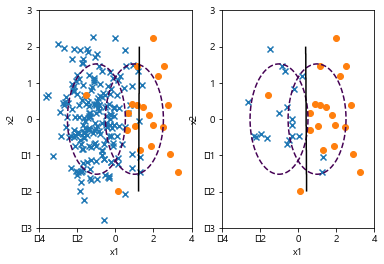

In [6]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [7]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



## Tomek’s link method
토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (x+,x−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

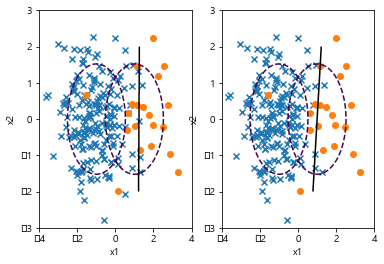

In [8]:
X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [9]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



## Condensed Nearest Neighbour
CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을 S라고 하자.

소수 클래스 데이터를 모두 S에 포함시킨다.

다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 S에 포함시킨다.

더이상 선택되는 데이터가 없을 때까지 2를 반복한다.

이 방법을 사용하면 기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에 다수 데이터의 경우 선택되는 비율이 적어진다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

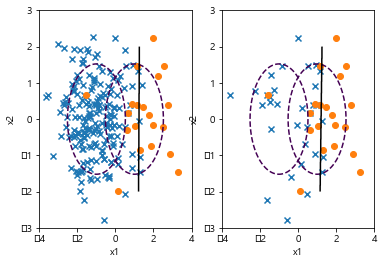

In [10]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [11]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



## One Sided Selection
One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

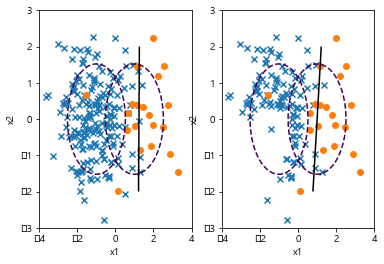

In [12]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [13]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



## Edited Nearest Neighbours
ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

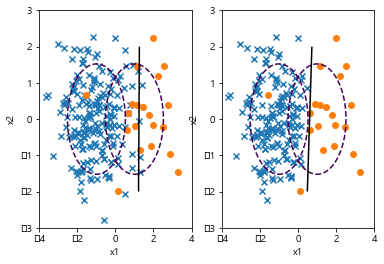

In [14]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [15]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       200
         1.0       0.58      0.90      0.71        20

    accuracy                           0.93       220
   macro avg       0.79      0.92      0.83       220
weighted avg       0.95      0.93      0.94       220



## Neighbourhood Cleaning Rule
Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

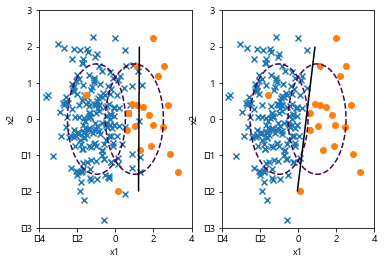

In [16]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [17]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       200
         1.0       0.56      0.95      0.70        20

    accuracy                           0.93       220
   macro avg       0.78      0.94      0.83       220
weighted avg       0.96      0.93      0.94       220



# 오버 샘플링
## RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique

## RandomOverSampler
Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [18]:
from imblearn.over_sampling import *

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

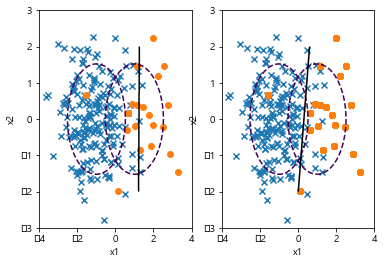

In [19]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [20]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.51      0.95      0.67        20

    accuracy                           0.91       220
   macro avg       0.75      0.93      0.81       220
weighted avg       0.95      0.91      0.92       220



# ADASYN
ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

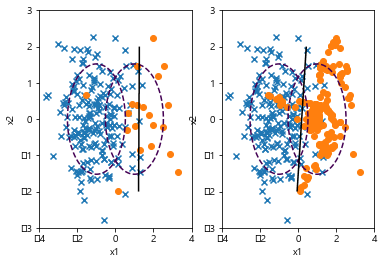

In [21]:
X_samp, y_samp = ADASYN(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [22]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       200
         1.0       0.47      0.95      0.63        20

    accuracy                           0.90       220
   macro avg       0.73      0.92      0.79       220
weighted avg       0.95      0.90      0.91       220



# SMOTE
SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

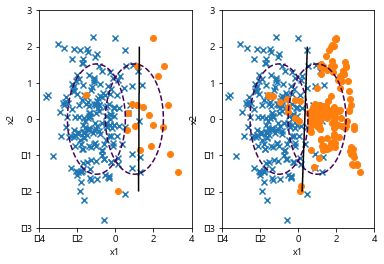

In [23]:
X_samp, y_samp = SMOTE(random_state=4).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [24]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.50      0.90      0.64        20

    accuracy                           0.91       220
   macro avg       0.74      0.91      0.80       220
weighted avg       0.94      0.91      0.92       220



## 복합 샘플링
### SMOTEENN: SMOTE + ENN
### SMOTETomek: SMOTE + Tomek

## SMOTE+ENN
SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

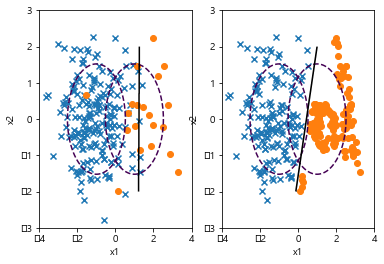

In [25]:
from imblearn.combine import SMOTEENN 
X_samp, y_samp = SMOTEENN(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [26]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       200
         1.0       0.54      0.95      0.69        20

    accuracy                           0.92       220
   macro avg       0.77      0.94      0.82       220
weighted avg       0.95      0.92      0.93       220



## SMOTE+Tomek
SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

<AxesSubplot:>

SVC(C=10000.0, kernel='linear', random_state=0)

<AxesSubplot:>

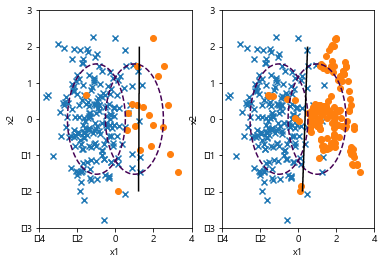

In [28]:
from imblearn.combine import SMOTETomek 
X_samp, y_samp = SMOTETomek(random_state=4).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [29]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



# 5. Ensemble of samplers
## 5.1. Classifier including inner balancing samplers
### 5.1.1. Bagging classifier

In [31]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94], class_sep=0.8,
                           random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0)
bc.fit(X_train, y_train) 

y_pred = bc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  
accuracy_score(y_test, y_pred)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

0.7739629664028289

0.9752

In [32]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.62      0.67        37
     class 1       0.87      0.70      0.78       135
     class 2       0.98      1.00      0.99      2328

    accuracy                           0.98      2500
   macro avg       0.86      0.77      0.81      2500
weighted avg       0.97      0.98      0.97      2500



In [33]:
from sklearn.metrics import accuracy_score
bc = DecisionTreeClassifier()
bc.fit(X_train, y_train) 

y_pred = bc.predict(X_test)
accuracy_score(y_test, y_pred) 
balanced_accuracy_score(y_test, y_pred)  

DecisionTreeClassifier()

0.9632

0.7453959113752928

In [34]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.53      0.54      0.53        37
     class 1       0.71      0.71      0.71       135
     class 2       0.98      0.98      0.98      2328

    accuracy                           0.96      2500
   macro avg       0.74      0.75      0.74      2500
weighted avg       0.96      0.96      0.96      2500



In BalancedBaggingClassifier, each bootstrap sample will be further resampled to achieve the sampling_strategy desired. Therefore, BalancedBaggingClassifier takes the same parameters than the scikit-learn BaggingClassifier. In addition, the sampling is controlled by the parameter sampler or the two parameters sampling_strategy and replacement, if one wants to use the RandomUnderSampler:

- sampler : 
https://imbalanced-learn.org/stable/auto_examples/ensemble/plot_bagging_classifier.html#sphx-glr-auto-examples-ensemble-plot-bagging-classifier-py
- sampling_strategy :  
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

The number of samples in the different classes will be equalized. Possible choices are:
- 'majority': resample only the majority class;
- 'not minority': resample all classes but the minority class; (소수범주 유형의 데이터는 남기고 모든 유형의 데이터를 재표본 추출)
- 'not majority': resample all classes but the majority class; 
- 'all': resample all classes;
- 'auto': equivalent to 'not minority'.

In [35]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampler=RandomUnderSampler(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train) 

y_pred = bbc.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0, sampler=RandomUnderSampler())

0.8251353587264241

In [36]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.20      0.81      0.32        37
     class 1       0.45      0.76      0.57       135
     class 2       0.99      0.90      0.94      2328

    accuracy                           0.89      2500
   macro avg       0.55      0.83      0.61      2500
weighted avg       0.95      0.89      0.91      2500



### 5.1.2. Forest of randomized trees
BalancedRandomForestClassifier is another ensemble method in which each tree of the forest will be provided a balanced bootstrap sample [CLB+04]. This class provides all functionality of the RandomForestClassifier:

In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train) 

y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

BalancedRandomForestClassifier(random_state=0)

0.8102589703105166

In [38]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.16      0.78      0.27        37
     class 1       0.60      0.73      0.66       135
     class 2       0.99      0.91      0.95      2328

    accuracy                           0.90      2500
   macro avg       0.58      0.81      0.62      2500
weighted avg       0.95      0.90      0.92      2500



### 5.1.3. Boosting
Several methods taking advantage of boosting have been designed.

RUSBoostClassifier randomly under-sample the dataset before to perform a boosting iteration [SKVHN09]:

In [39]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)  

y_pred = rusboost.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

RUSBoostClassifier(n_estimators=200, random_state=0)

0.5885287349204874

In [40]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.30      0.22      0.25        37
     class 1       0.17      0.76      0.28       135
     class 2       0.98      0.79      0.88      2328

    accuracy                           0.78      2500
   macro avg       0.48      0.59      0.47      2500
weighted avg       0.93      0.78      0.84      2500



A specific method which uses AdaBoostClassifier as learners in the bagging classifier is called “EasyEnsemble”. The EasyEnsembleClassifier allows to bag AdaBoost learners which are trained on balanced bootstrap samples [LWZ08]. Similarly to the BalancedBaggingClassifier API, one can construct the ensemble as:

In [41]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train) 

y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

EasyEnsembleClassifier(random_state=0)

0.6248477859302602

In [42]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.04      0.24      0.07        37
     class 1       0.42      0.78      0.55       135
     class 2       0.99      0.85      0.92      2328

    accuracy                           0.84      2500
   macro avg       0.48      0.62      0.51      2500
weighted avg       0.94      0.84      0.88      2500



# End